In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def split_arr(line):
    line_arr=line.split(",")
    return(line_arr[0],line_arr[1:])

def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        labels=[]
        images=[]
        reader = training_file. readlines()
        # Your code starts here
        for line in reader[1:]:
            label, arr = split_arr(line[:-1])
            labels.append(label)            
            old_img = np.array(arr)
            new_img = np.array_split(old_img,28)
            images.append(new_img)
        images=np.array(images).astype('float')
        labels=np.array(labels).astype('int')
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,axis=3)
testing_images = np.expand_dims(testing_images,axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=35,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_act_gen = train_datagen.flow(training_images,training_labels)

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_act_gen = validation_datagen.flow(testing_images,testing_labels)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [6]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(26,activation='softmax')
])

# Compile Model 
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

# Train the Model
history = model.fit_generator(
            train_act_gen, 
            epochs=10, 
            steps_per_epoch= len(training_images) / 32, 
            validation_data = validation_act_gen, 
            validation_steps=len(training_images) / 32,        
            verbose = 1)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10
858/857 [==============================] - 82s 96ms/step - loss: 3.0235 - accuracy: 0.0935 - val_loss: 2.6994 - val_accuracy: 0.1636
Epoch 2/10
858/857 [==============================] - 86s 101ms/step - loss: 2.6237 - accuracy: 0.1928 - val_loss: 2.3541 - val_accuracy: 0.2563
Epoch 3/10
858/857 [==============================] - 87s 102ms/step - loss: 2.2954 - accuracy: 0.2826 - val_loss: 1.8014 - val_accuracy: 0.3929
Epoch 4/10
858/857 [==============================] - 82s 95ms/step - loss: 2.0575 - accuracy: 0.3510 - val_loss: 1.5549 - val_accuracy: 0.4563
Epoch 5/10
858/857 [==============================] - 86s 100ms/step - loss: 1.9115 - accuracy: 0.3914 - val_loss: 1.4433 - val_accuracy: 0.4877
Epoch 6/10
858/857 [==============================] - 85s 99ms/step - loss: 1.7893 - accuracy: 0.4295 - val_loss: 1.1946 - val_accuracy: 0.5742
Epoch 7/10
858/857 [==============================] - 78s 91ms/step - loss: 1.7061 - accuracy: 0.4496 - val_loss: 1.1590 - val_accura

[364.69763660164966, 0.3409091]

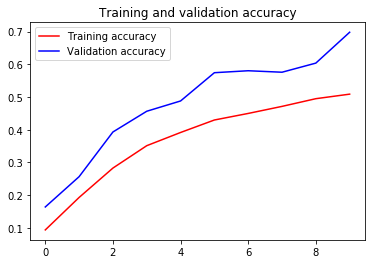

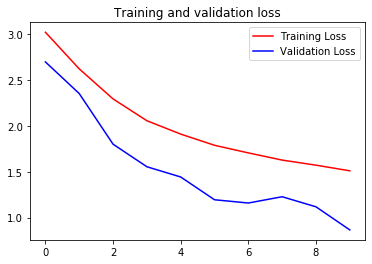

In [7]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);